# Deep Learning Project 02

In order to use this notebook, the user has first to clone the project files on your drive. Then, the path in the second cell should be modified to the one directing at the location of the project files on the user's drive.

In [1]:
from google.colab import drive
import os

drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/Deep_Learning_Project

/content/drive/My Drive/Deep_Learning_Project


### Importing Libraries and files and setting Parameters

In [3]:
import torch

from loss import *
from helpers import generator, plot_cross_validation
from modules import Linear, Sequential
from activations import ReLU, Tanh, Sigmoid
from cross_validation import Cross_Validation
from train import Optimizer

torch.set_grad_enabled(False)

In [4]:
# Parameters :
N = 1000
INPUT_SIZE = 2
OUTPUT_SIZE = 2
NUM_HIDDEN_LAYERS = 3
NUM_HIDDEN_UNITS = 25
NUM_EPOCH = 100
BATCH_SIZE = 4
CRITERION = "CE"

# Xavier initialization :
XAVIER_GAIN = 6.0

# Adam Optimizer parameters : (best params found with cross-validation)
ADAM = False
LEARNING_RATE = 0.0001
B1 = 0.8
B2 = 0.899
EPSILON = 1e-8

# Cross validation boolean parameter :
PLOT = True # Valid only for Cross-Validation

# Generate Data sampled from an uniform distribution in the interval [0,1]
train_input, train_labels = generator(N)
test_input, test_labels = generator(N)


Models_names = ["ReLU_network", "Tanh_network", "Sigmoid_network"]
Models = [Sequential(Linear(INPUT_SIZE,NUM_HIDDEN_UNITS), ReLU(),
                     Linear(NUM_HIDDEN_UNITS,NUM_HIDDEN_UNITS), ReLU(),
                     Linear(NUM_HIDDEN_UNITS,NUM_HIDDEN_UNITS), ReLU(),
                     Linear(NUM_HIDDEN_UNITS,OUTPUT_SIZE), Xavier = True, Xavier_gain = XAVIER_GAIN),
          Sequential(Linear(INPUT_SIZE,NUM_HIDDEN_UNITS), Tanh(),
                     Linear(NUM_HIDDEN_UNITS,NUM_HIDDEN_UNITS), Tanh(),
                     Linear(NUM_HIDDEN_UNITS,NUM_HIDDEN_UNITS), Tanh(),
                     Linear(NUM_HIDDEN_UNITS,OUTPUT_SIZE), Xavier = True, Xavier_gain = XAVIER_GAIN),
          Sequential(Linear(INPUT_SIZE,NUM_HIDDEN_UNITS), Sigmoid(),
                     Linear(NUM_HIDDEN_UNITS,NUM_HIDDEN_UNITS), Sigmoid(),
                     Linear(NUM_HIDDEN_UNITS,NUM_HIDDEN_UNITS), Sigmoid(),
                     Linear(NUM_HIDDEN_UNITS,OUTPUT_SIZE), Xavier = True, Xavier_gain = XAVIER_GAIN)
         ]

### Cross Validation

Validation with values : lr = 0.0001
Accuracy of the RelU_network = 0.97
Accuracy of the Tanh_network = 0.97
Accuracy of the Sigmoid_network = 0.97
Validation with values : lr = 0.0112
Accuracy of the RelU_network = 0.97
Accuracy of the Tanh_network = 0.97
Accuracy of the Sigmoid_network = 0.97
Validation with values : lr = 0.0223
Accuracy of the RelU_network = 0.97
Accuracy of the Tanh_network = 0.97
Accuracy of the Sigmoid_network = 0.97
Validation with values : lr = 0.0334
Accuracy of the RelU_network = 0.97
Accuracy of the Tanh_network = 0.97
Accuracy of the Sigmoid_network = 0.97
Validation with values : lr = 0.0445
Accuracy of the RelU_network = 0.97
Accuracy of the Tanh_network = 0.97
Accuracy of the Sigmoid_network = 0.97
Validation with values : lr = 0.0556
Accuracy of the RelU_network = 0.97
Accuracy of the Tanh_network = 0.97
Accuracy of the Sigmoid_network = 0.97
Validation with values : lr = 0.0667
Accuracy of the RelU_network = 0.97
Accuracy of the Tanh_network = 0.97
Acc

No handles with labels found to put in legend.


Accuracy of the RelU_network = 0.97
Accuracy of the Tanh_network = 0.97
Accuracy of the Sigmoid_network = 0.97
Results of Cross-Validation
The best parameters of the RelU_network with an accuracy of 0.97 are :
lr = 9.999999747378752e-05 
eps = 1e-08 
b1 = 0.9 
b2 = 0.999 
The best parameters of the Tanh_network with an accuracy of 0.97 are :
lr = 9.999999747378752e-05 
eps = 1e-08 
b1 = 0.9 
b2 = 0.999 
The best parameters of the Sigmoid_network with an accuracy of 0.97 are :
lr = 9.999999747378752e-05 
eps = 1e-08 
b1 = 0.9 
b2 = 0.999 


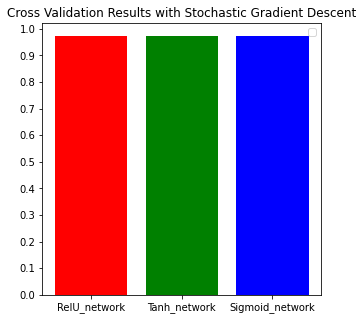

In [5]:
cross_params = {"lr" : torch.linspace(1e-4, 1e-1, 10)}

if ADAM:
  cross_params["eps"] = torch.linspace(1e-8, 1e-6, 3)
  cross_params["b1"] = torch.linspace(0.8, 0.9, 2)
  cross_params["b2"] = torch.linspace(0.9, 0.999, 2)

CV = Cross_Validation(Models, Models_names, cross_params)
CV.cross_validation(epochs = NUM_EPOCH, mini_batch_size = BATCH_SIZE,
                    criterion = CRITERION, Adam = ADAM)

print("Results of Cross-Validation")
for model, name in zip(Models, Models_names):
  print("The best parameters of the {} with an accuracy of {:.2f} are :".format(name, CV.best_params[name]["accuracy"]))
  for param_name in CV.best_params[name]:
    if not param_name == "accuracy":
      print("{} = {} ".format(param_name, CV.best_params[name][param_name]))

if PLOT:
  plot_cross_validation(accuracy = CV.best_params, Adam = ADAM)

### Training with Optimum parameters

In [5]:
# Best parameters :

# Loss : Mean Squared Error 
params_SGD_MSE = {"lr" : 1e-4, "epsilon" : 1e-8, "b1" : 0.9, "b2" : 0.999} # epsilon, b1, and b2 don't have any importance with SGD
params_Adam_MSE = {"lr" : 1e-4, "epsilon" : 1e-8, "b1" : 0.8, "b2" : 0.899}

# Loss : Cross Entropy
params_SGD_CE = {"lr" : 1e-4, "epsilon" : 1e-8, "b1" : 0.9, "b2" : 0.999} # epsilon, b1, and b2 don't have any importance with SGD
params_Adam_CE = {"lr" : 1e-4, "epsilon" : 1e-8, "b1" : 0.8, "b2" : 0.899}

#### Choose your network:

  - Choice of activation function :
    - Rectified Linear Unit : param name "ReLU"
    - Hyperbolic tangent : param name "Tanh"
    - Sigmoid : param name "Sigmoid"
  - Choice for the loss :
    - Mean Squared Error : param name "MSE"
    - Cross Entropy : param name "CE"
  - Choice of Optimization :
    - Stochastic gradient descent : param name "SGD"
    - Adam : param name "ADAM"

In [19]:
ACTIVATION = "ReLU" # or "Tanh" or "Sigmoid"
LOSS = "CE" # or "MSE"
OPTIMIZER = "ADAM" # or "SGD"

In [20]:
your_optimization = True if OPTIMIZER == "ADAM" else False
your_model = [Models[Models_names.index(ACTIVATION + "_network")]]
your_model_name = ACTIVATION + "_network"

if LOSS == "MSE":
  if OPTIMIZER == "ADAM":
    params = params_Adam_MSE
  else:
    params = params_SGD_MSE
elif LOSS == "CE":
  if OPTIMIZER == "ADAM":
    params = params_Adam_CE
  else:
    params = params_SGD_CE

In [21]:
# Construct the optimizer and generate Data sampled from an uniform distribution in the interval [0,1]
optimizer = Optimizer(your_model, your_model_name, epochs = NUM_EPOCH,  mini_batch_size = BATCH_SIZE,
                      criterion = LOSS, learning_rate = params["lr"], Adam = your_optimization,
                      epsilon = params["epsilon"], beta_1 = params["b1"], beta_2 = params["b2"])

# Training of the models:
optimizer.train(train_input, train_labels)

# Computing the accuracy :
accuracy_train = optimizer.compute_accuracy(train_input, train_labels)
accuracy_test = optimizer.compute_accuracy(test_input, test_labels)

for index, name in enumerate(Models_names):
  if name == your_model_name:
    print('Train accuracy of {} = {:.2f}'.format(name, accuracy_train[index].item()*100))
    print('Test accuracy of {} = {:.2f}'.format(name, accuracy_test[index].item()*100))

Train accuracy of ReLU_network = 97.30
Test accuracy of ReLU_network = 97.40
